In [2]:
# Loading all the required libraries
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
# Reading dataframe from the internet and storing it to a variable
gulls <- read_csv("https://raw.githubusercontent.com/maggie63/stat-201-group-4/main/gulls_data.csv") |>
    mutate(LOCATION = as_factor(LOCATION), COAST = as_factor(COAST), SEASON = as_factor(SEASON), SEX = as_factor(SEX))

# Printing the first few rows of the dataframe
head(gulls)

Rows: 2487 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): LOCATION, COAST, SEASON, SEX
dbl (2): WEIGHT, LENGTH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


WEIGHT,LENGTH,LOCATION,COAST,SEASON,SEX
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
262,38.9,MARAETAI,EAST,WINTER,MALE
300,41.3,MURIWAI,WEST,SUMMER,MALE
250,36.6,MURIWAI,WEST,WINTER,MALE
242,36.0,MARAETAI,EAST,WINTER,FEMALE
261,37.1,MURIWAI,WEST,WINTER,MALE
262,38.2,MURIWAI,WEST,WINTER,MALE


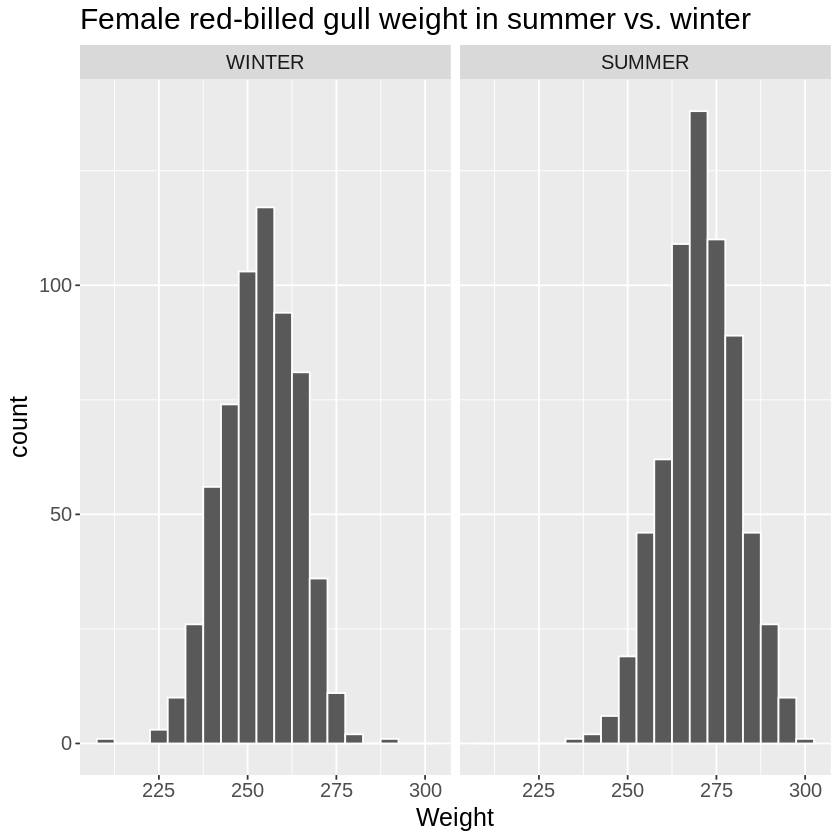

In [20]:
# Filtering and grouping data
gull_seasons <- gulls |> 
    filter(SEX == "FEMALE" & (!is.na(WEIGHT))) |>
    select(WEIGHT, SEASON) |>
    group_by(SEASON)

# Plotting population distribution in summer vs. winter
gull_pop_dist <- gull_seasons |>
    ggplot() + 
    geom_histogram(aes(x = WEIGHT), binwidth = 5, color = 'white') +
    facet_wrap(~ SEASON) + 
    labs(x = "Weight", title = "Female red-billed gull weight in summer vs. winter") +
    theme(text = element_text(size = 15))
gull_pop_dist

In [24]:
# Setting the seed
set.seed(1)

# Drawing a sample of size 50
gull_sample <- gull_seasons |> group_by(SEASON) |> sample_n(size = 50)

# Computing estimates
gull_summary <- gull_sample |>
    group_by(SEASON) |>
    summarise(n = n(),
              sample_mean = mean(WEIGHT), 
              sample_std_error = sd(WEIGHT) / sqrt(n))
gull_summary

SEASON,n,sample_mean,sample_std_error
<fct>,<int>,<dbl>,<dbl>
WINTER,50,255.14,1.487364
SUMMER,50,272.50,1.445118
